

---
### **과제-3**

- 책 94~104 code 실행해보고 자유형식으로 제출

- skitlearn 에서 유방암 데이터를 불러와 KNN 적용해보기.


---




#### **유방암 데이터**


In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer_df = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
print(cancer_df.shape)

(569, 31)


In [5]:
X = cancer_df.drop("target", axis = 1)
print(X.shape)
y = cancer_df["target"]

(569, 30)


In [6]:
np.unique(y)  # y는 범주형 : 0(유방암 x), 1(유방암 o)

array([0, 1])

### 데이터 분리
+ train 70%, test 30%

In [7]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### KNN

#### 표준화 되지 않은 데이터에 KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
print("학습 데이터 점수 : {}".format(knn.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(knn.score(X_test,y_test)))

학습 데이터 점수 : 0.9396984924623115
평가 데이터 점수 : 0.9239766081871345


In [10]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print('Misclassified training samples : %d' %(y_train!= y_train_pred).sum()) 
print('Misclassified test samples : %d' %(y_test!= y_test_pred).sum())

Misclassified training samples : 24
Misclassified test samples : 13


In [11]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_test_pred))

0.9239766081871345


In [12]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)
print(conf)

[[ 54   5]
 [  8 104]]


#### 표준화된 데이터에 KNN 적용

#### 데이터 표준화

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [16]:
# 5-fold cross validation
cross_validate(
    estimator = KNeighborsClassifier(),
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.5s finished


{'fit_time': array([0.01326156, 0.00523782, 0.00404382, 0.00418234, 0.00439239]),
 'score_time': array([0.02874589, 0.02056813, 0.0183804 , 0.02472878, 0.02833438]),
 'test_score': array([0.88596491, 0.93859649, 0.93859649, 0.94736842, 0.92920354])}

In [17]:
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)
print('Misclassified training samples : %d' %(y_train!= y_train_pred).sum()) 
print('Misclassified test samples : %d' %(y_test!= y_test_pred).sum())

Misclassified training samples : 9
Misclassified test samples : 7


In [18]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_test_pred))

0.9590643274853801


In [19]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)
print(conf)

[[ 52   7]
 [  0 112]]


+ 유방암 데이터의 경우에는 표준화를 시행하는 것이 정확도를 높일 수 있는 방법이었다. (accuracy : 0.92 → 0.95)

#### GridSearch를 통한 KNN

In [20]:
# GridSearchCV
param_grid = [{"n_neighbors" : [3, 5, 7],
               "weights" : ["uniform", "distance"],
               "algorithm" : ["ball_tree", "kd_tree", "brute"]}]

In [21]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [22]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [23]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [24]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9397784810126583


In [25]:
model2 = KNeighborsClassifier(algorithm='ball_tree')
model2.fit(X_train, y_train)
predict = model2.predict(X_test)

In [26]:
print(predict)

[0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0
 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0]


In [27]:
def make_meshgrid(x,y,h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
  return xx, yy

def plot_contours(clf,xx,yy,**params):
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy,Z,**params)

  return out

In [28]:
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [30]:
cancer_comp_df = pd.DataFrame(data = X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,2.100872,35.535698,0
1,2.846646,32.904385,0
2,-1.445346,30.554783,0
3,10.019590,-11.187191,0
4,-3.647033,31.454174,0
...,...,...,...
564,4.546270,32.696442,0
565,-0.968917,31.596846,0
566,-15.595978,18.952658,0
567,0.651052,32.501041,0


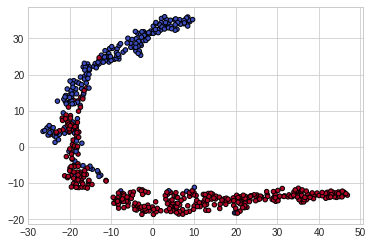

In [31]:
plt.scatter(X_comp[:, 0],X_comp[:, 1],
            c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")

In [32]:
model3 = KNeighborsClassifier()
model3.fit(X_comp,y)
predict = model3.predict(X_comp)

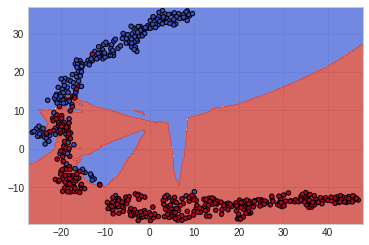

In [33]:
xx, yy = make_meshgrid(X_comp[:, 0],X_comp[:, 1])
plot_contours(model3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0],X_comp[:,1],c=y,cmap=plt.cm.coolwarm,s=20, edgecolors='k')